# Exploratory Data Analysis
### Census of ground floor stores in Barcelona, 2019

In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import geopandas

In [2]:
data = pd.read_csv('./data/2019_censcomercialbcn_detall.csv')
print(data.shape)
data.head()

(80554, 49)


/home/antonia/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID_Bcn_2019,ID_Bcn_2016,Codi_Principal_Activitat,Nom_Principal_Activitat,Codi_Sector_Activitat,Nom_Sector_Activitat,Codi_Grup_Activitat,Nom_Grup_Activitat,Codi_Activitat_2019,Nom_Activitat,...,Solar,Codi_Parcela,Codi_Illa,Seccio_Censal,Codi_Barri,Nom_Barri,Codi_Districte,Nom_Districte,Referencia_cadastral,Data_Revisio
0,1075454,NaN,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0
1,1075453,NaN,1,Actiu,2,Serveis,16,Altres,1600102,Activitats emmagatzematge,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0
2,1075451,NaN,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0
3,1075449,NaN,1,Actiu,3,Altres,17,Altres,1700100,Administració,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0
4,1075448,NaN,1,Actiu,2,Serveis,16,Altres,1600101,Activitats de transport,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0


## Missing values

- *ID_Bcn_2016* is the store code for the 2016 dataset. The stores that doesn't have this code have probably opened after 2016.
- *Nom_Mercat* is the name of the food market where the store is located. A lot of stores are not inside food markets, that's why this column has so many missing values.
- *Nom_Galeria*, *Nom_CComercial* and *Nom_Eix* are, respectively, the name of the shopping arcade, shopping mall or shopping district where the store is located. These can be explained like the *Nom_Mercat* column.
- Some street numbers have also letters, but many others don't, that's why *Lletra inicial* and *LLetra final* have so many missing values.

<AxesSubplot:>

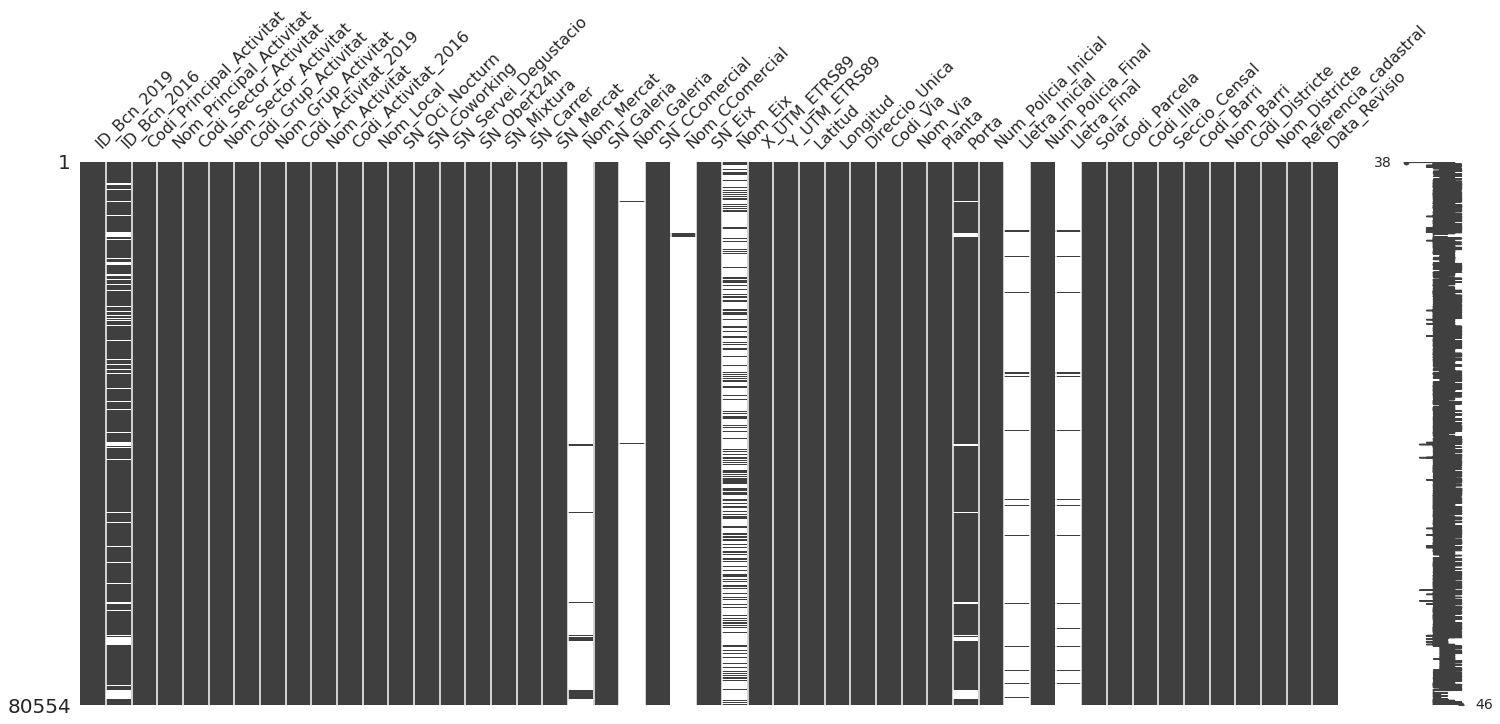

In [3]:
import missingno as msno
msno.matrix(data)

## Distribution of stores by activity

1. Let's see first the distribution by **activity sectors** (Services, retail, wholesale...)

In [4]:
def countplot_var(df, var, figsize=(12,8)):
    order_columns = df[var].value_counts(normalize=True).sort_values(ascending=False).index
    fig, ax = plt.subplots(figsize=figsize)
    sns.countplot(y=var, data=df, ax=ax, order=order_columns)
    print(df[var].value_counts(normalize=True).sort_values(ascending=False))

Serveis                                              0.414654
Comerç al detall                                     0.264742
Sense informació                                     0.138590
Altres                                               0.076321
Sense informació - Havia tingut activitat (rètol)    0.053082
Locals buits en lloguer                              0.017330
En reforma                                           0.011843
Comerç al detall /Engròs                             0.008466
Locals buits en venda                                0.007970
Locals buits en venda i lloguer                      0.007002
Name: Nom_Sector_Activitat, dtype: float64


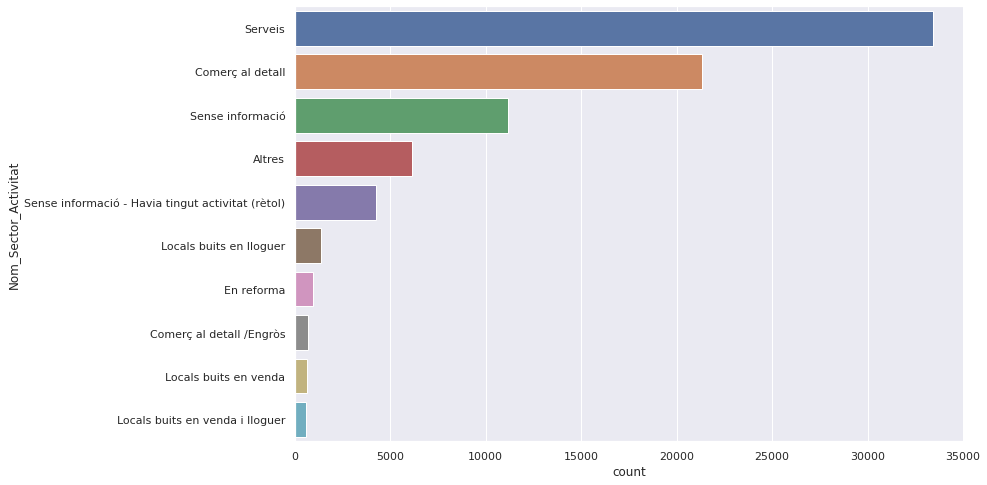

In [5]:
countplot_var(data, 'Nom_Sector_Activitat')

In [6]:
columns_empty_stores = ['Locals buits en venda', 'Locals buits en venda i lloguer', 'Locals buits en lloguer', 'Sense informació - Havia tingut activitat (rètol)']
ratio_empty_stores = data['Nom_Sector_Activitat'].value_counts(normalize=True).loc[columns_empty_stores].sum()

print(f'The ratio of empty stores in Barcelona is {ratio_empty_stores:.2f}')

The ratio of empty stores in Barcelona is 0.09


- About a 41% of the stores in Barcelona work in the services sector (*Serveis*)
- 26% of the stores are retail stores (*Comerç al detail*)
- Less than 1% of the stores work as retail and wholesale shops
- A 9% of the stores are empty (for sale or rent, or with a sign from the previous business)

2. Now, let's plot the distribution of the **groups of activities** (restaurants, grocery shops, leisure)

Altres                                                            0.266852
Grup no definit                                                   0.235817
Restaurants, bars i hotels (Inclòs hostals, pensions i fondes)    0.138503
Quotidià alimentari                                               0.097450
Equipament personal                                               0.061052
Quotidià no alimentari                                            0.032177
Parament de la llar                                               0.030054
Ensenyament                                                       0.026256
Sanitat i assistència                                             0.025126
Oci i cultura                                                     0.020409
Reparacions (Electrodomèstics i automòbils)                       0.017442
Finances i assegurances                                           0.015418
Equipaments culturals i recreatius                                0.012873
Activitats immobiliàries 

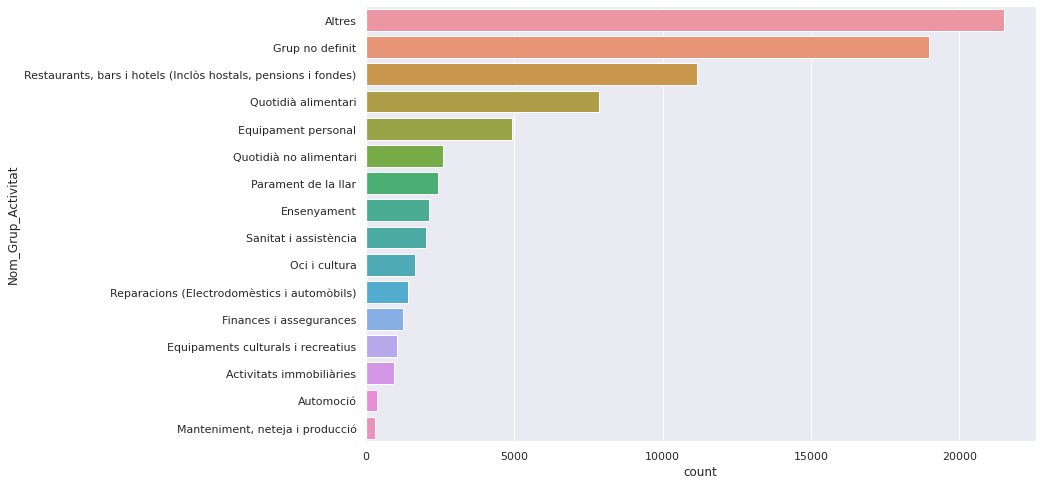

In [7]:
countplot_var(data, 'Nom_Grup_Activitat')

- Restaurants, bars and hotels are the more populated group, with a 14% (after non-defined activity group, *Altres* and *Grup no definit*)
- Personal apparel shops (*Equipament personal*) are a 6.1% of the stores
- After that: 
    - grocery shops (*Quotidià no alimentari*): 3.2%
    - household goods shops (*Parament de la llar*): 3%
    - education (*Ensenyament*): 2.6%
    - healthcare (*Sanitat i assistencia*): 2.5%
    - leisure and culture (*Oci i cultura*): 2%
    - repairs (*Reparacions (Electrodomèstics i automóbils)*): 1.7%
    - finances and insurers (*Finances i assegurances*): 1.5&
    - leisure and cultural equipments (*Equipaments culturals i recreatius*): 1.3%
    - real state activities (*Activitats inmobiliàries*): 1.2%
    - automotive (*Automoció*):0.5%
    - maintenance and cleaning (*Manteniment, neteja i producció*): 0.4%
    

## Distribution of stores by neighbourhood and district

By neighbourhood:

la Vila de Gràcia                  0.055329
la Dreta de l'Eixample             0.053120
Sant Gervasi - Galvany             0.039725
l'Antiga Esquerra de l'Eixample    0.037043
el Raval                           0.036845
                                     ...   
Baró de Viver                      0.000956
Can Peguera                        0.000546
Torre Baró                         0.000459
Vallbona                           0.000335
la Clota                           0.000248
Name: Nom_Barri, Length: 73, dtype: float64


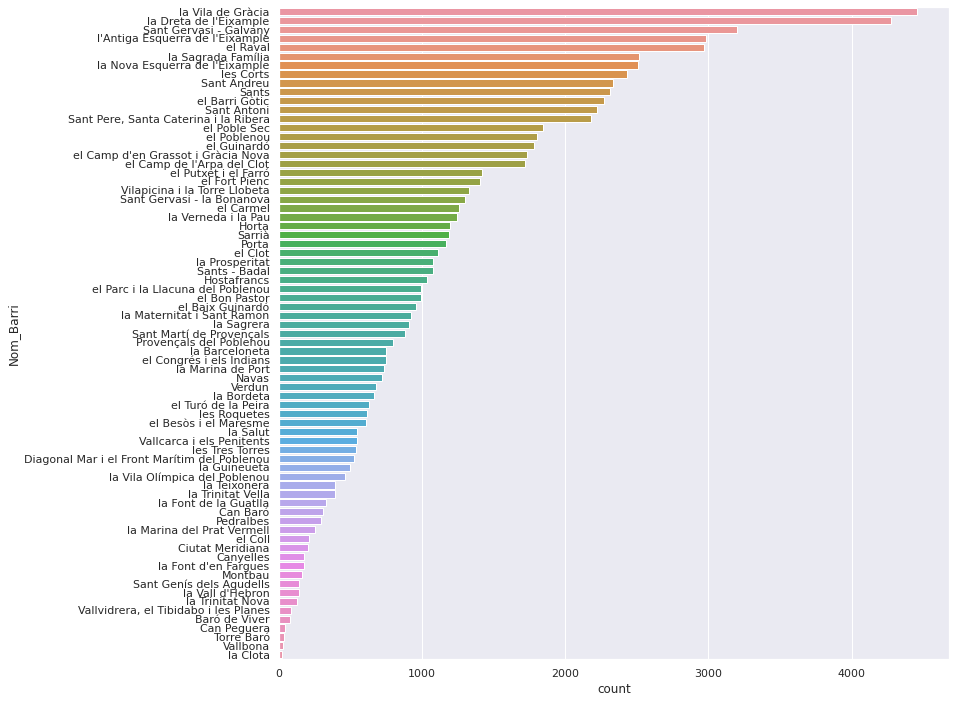

In [8]:
countplot_var(data, 'Nom_Barri', figsize=(12,12))

Eixample               0.197557
Sant Martí             0.125791
Sants-Montjuïc         0.102217
Ciutat Vella           0.101373
Sarrià-Sant Gervasi    0.095812
Gràcia                 0.092907
Nou Barris             0.081846
Horta-Guinardó         0.080865
Sant Andreu            0.076458
Les Corts              0.045175
Name: Nom_Districte, dtype: float64


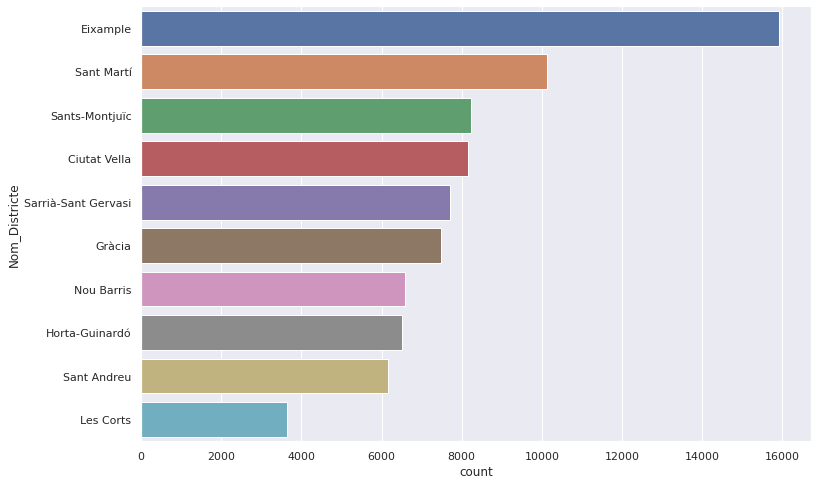

In [10]:
countplot_var(data, 'Nom_Districte')

The center districts are the ones witht the largest number of stores: Eixample, Sant Martí, Sants-Montjuic, Ciutat Vella

## Maps

In [19]:
geo_barcelona = geopandas.read_file("./data/neighborhoods.geojson")
geo_barcelona.drop(geo_barcelona.columns.difference(['NOM', 'geometry']), axis=1, inplace=True)
print(geo_barcelona.crs)
geo_barcelona.head()

epsg:4326


,NOM,geometry
0,el Raval,"POLYGON ((2.16471 41.38593, 2.16936 41.38554, ..."
1,el Barri Gòtic,"POLYGON ((2.17701 41.38525, 2.17873 41.38396, ..."
2,la Barceloneta,"POLYGON ((2.19623 41.38745, 2.19631 41.38745, ..."
3,la Dreta de l'Eixample,"POLYGON ((2.17091 41.40182, 2.17221 41.40083, ..."
4,l'Antiga Esquerra de l'Eixample,"POLYGON ((2.15736 41.39331, 2.15847 41.39245, ..."


The name of the neighbourhood "El Poble Sec" is spelled differently in the geojson, so I'm going to change it:

In [51]:
geo_barcelona = geo_barcelona.replace('el Poble-sec', 'el Poble Sec')

In [52]:
import geopandas
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(data['Longitud'], data['Latitud'])]
crs = {'init': 'epsg:4326'} 
geo_stores = geopandas.GeoDataFrame(data, crs=geo_barcelona.crs, geometry=geometry)

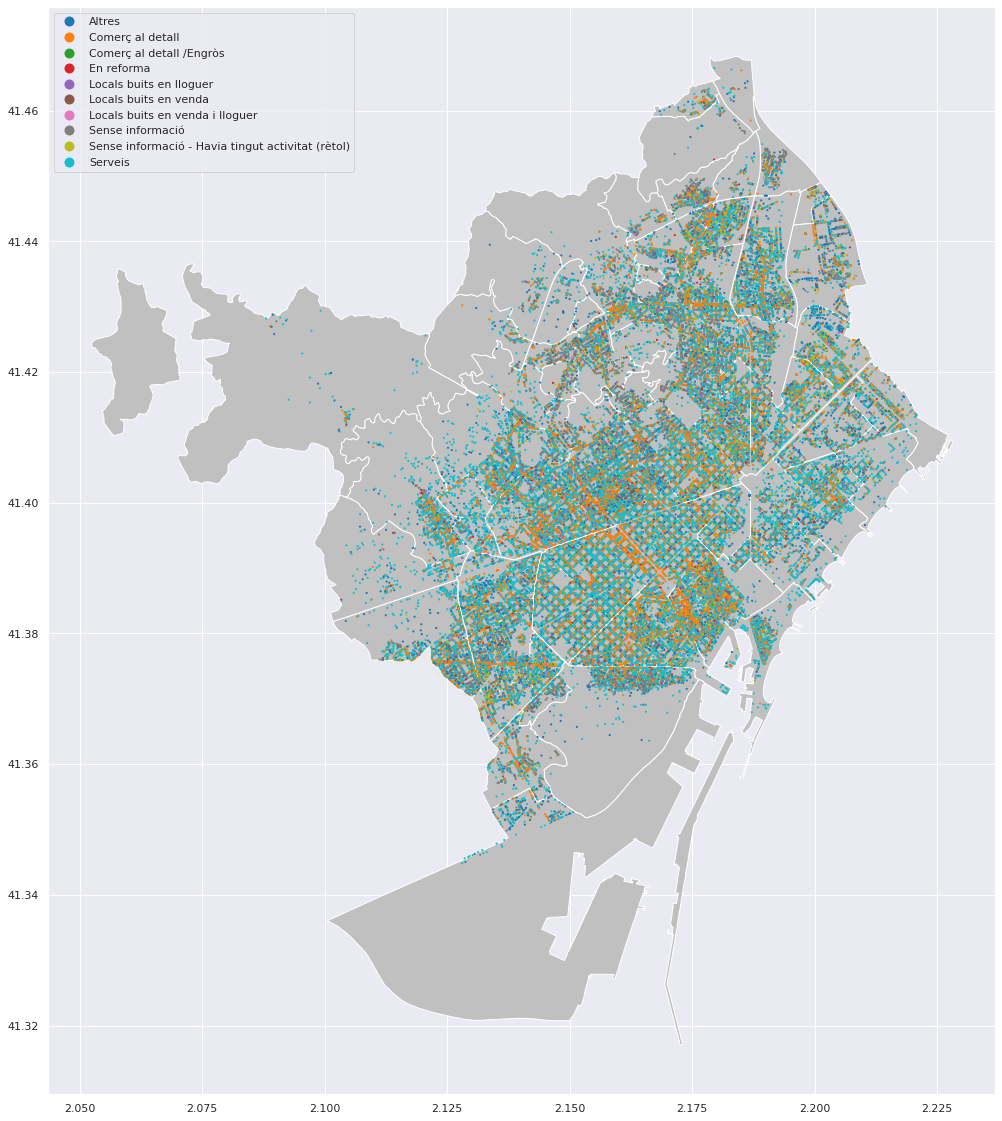

In [53]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_aspect('equal')

geo_barcelona.plot(color='silver', ax=ax)
geo_stores.plot(ax=ax, column='Nom_Sector_Activitat', marker = '.', markersize=5, legend=True)

plt.show()

This map is not very clear, let's load a cleaned dataset with the ratio of each activity group in every neighbourhood 

In [46]:
activity_groups = pd.read_csv('./data/cleaned/activity_groups_by_neighbourhood.csv')
print(activity_groups.shape)
activity_groups.head()

(73, 17)


,Nom_Barri,Activitats immobiliàries,Altres,Automoció,Ensenyament,Equipament personal,Equipaments culturals i recreatius,Finances i assegurances,Grup no definit,"Manteniment, neteja i producció",Oci i cultura,Parament de la llar,Quotidià alimentari,Quotidià no alimentari,Reparacions (Electrodomèstics i automòbils),"Restaurants, bars i hotels (Inclòs hostals, pensions i fondes)",Sanitat i assistència
0,Baró de Viver,0.000000,0.142857,0.000000,0.051948,0.000000,0.038961,0.000000,0.571429,0.000000,0.000000,0.012987,0.064935,0.025974,0.000000,0.077922,0.012987
1,Can Baró,0.000000,0.203883,0.000000,0.009709,0.006472,0.006472,0.003236,0.553398,0.000000,0.006472,0.006472,0.077670,0.035599,0.022654,0.061489,0.006472
2,Can Peguera,0.000000,0.204545,0.000000,0.068182,0.000000,0.045455,0.000000,0.522727,0.000000,0.000000,0.000000,0.022727,0.045455,0.000000,0.045455,0.045455
3,Canyelles,0.005714,0.131429,0.005714,0.028571,0.011429,0.011429,0.017143,0.394286,0.005714,0.000000,0.005714,0.194286,0.051429,0.028571,0.102857,0.005714
4,Ciutat Meridiana,0.004926,0.182266,0.000000,0.029557,0.024631,0.004926,0.039409,0.384236,0.000000,0.014778,0.014778,0.147783,0.034483,0.014778,0.088670,0.014778


Let's merge this with the geojson for Barcelona:

In [55]:
merged = geo_barcelona.merge(activity_groups, right_on='Nom_Barri', left_on='NOM', how='right')
merged = merged.drop(columns=['NOM'])
merged.head(2)

,geometry,Nom_Barri,Activitats immobiliàries,Altres,Automoció,Ensenyament,Equipament personal,Equipaments culturals i recreatius,Finances i assegurances,Grup no definit,"Manteniment, neteja i producció",Oci i cultura,Parament de la llar,Quotidià alimentari,Quotidià no alimentari,Reparacions (Electrodomèstics i automòbils),"Restaurants, bars i hotels (Inclòs hostals, pensions i fondes)",Sanitat i assistència
0,"POLYGON ((2.19664 41.44257, 2.19560 41.44249, ...",Baró de Viver,0.0,0.142857,0.0,0.051948,0.000000,0.038961,0.000000,0.571429,0.0,0.000000,0.012987,0.064935,0.025974,0.000000,0.077922,0.012987
1,"POLYGON ((2.16617 41.42002, 2.16617 41.41993, ...",Can Baró,0.0,0.203883,0.0,0.009709,0.006472,0.006472,0.003236,0.553398,0.0,0.006472,0.006472,0.077670,0.035599,0.022654,0.061489,0.006472


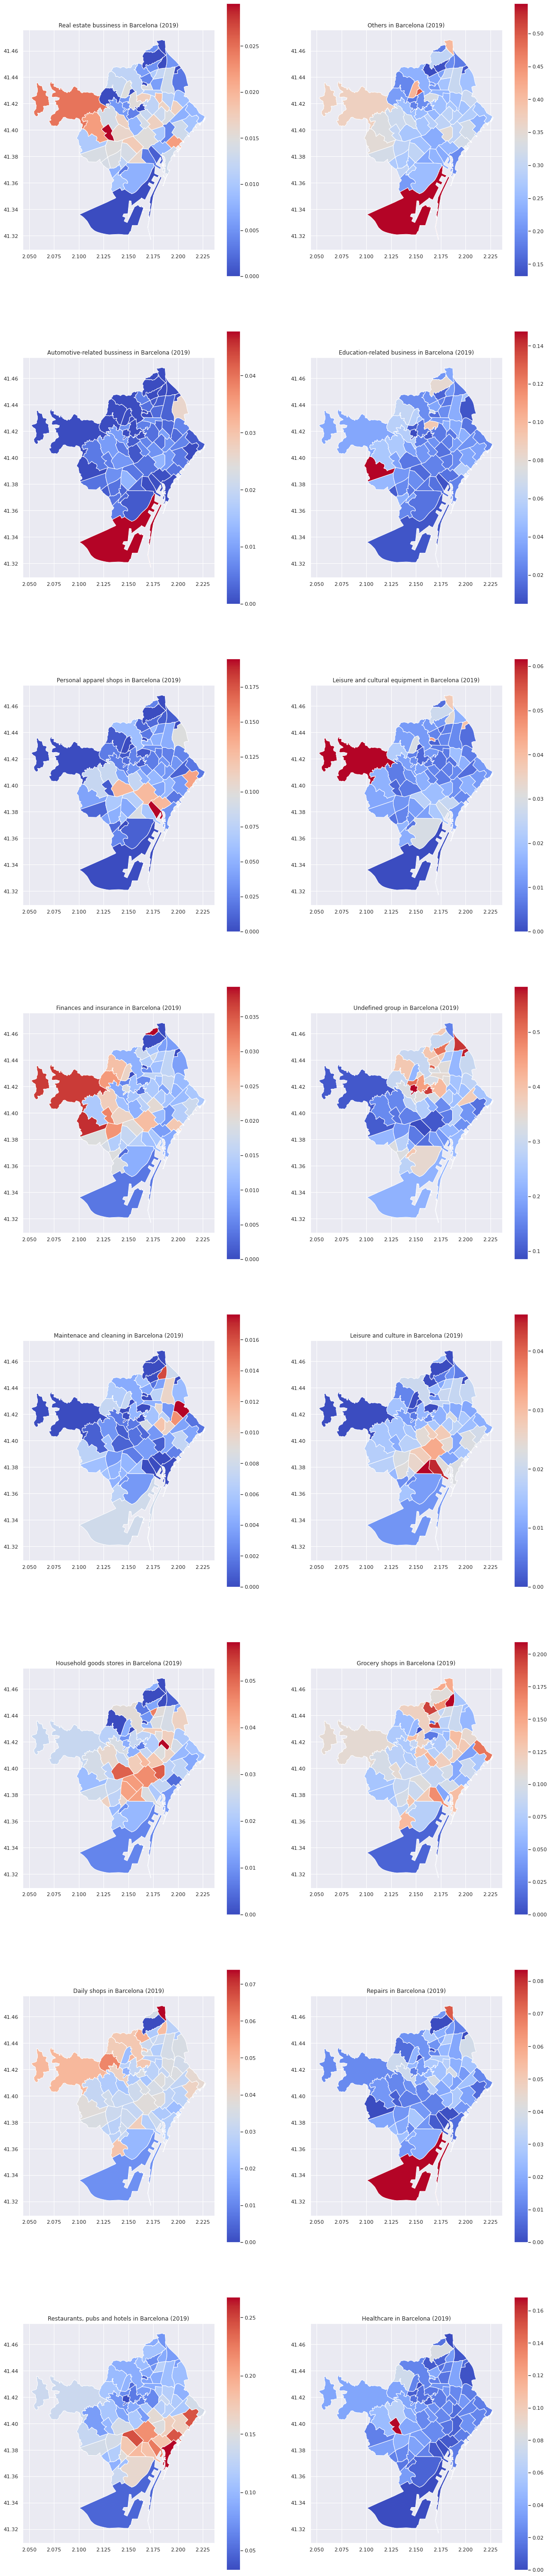

In [83]:
variables = activity_groups.columns.drop('Nom_Barri')
titles = ['Real estate bussiness', 'Others', 'Automotive-related bussiness', 'Education-related business',
         'Personal apparel shops', 'Leisure and cultural equipment', 'Finances and insurance', 'Undefined group',
         'Maintenace and cleaning', 'Leisure and culture', 'Household goods stores', 'Grocery shops',
         'Daily shops', 'Repairs', 'Restaurants, pubs and hotels', 'Healthcare']

fig = plt.figure(figsize=(20, 100))

n_cols = 2
n_rows = int(np.ceil(len(variables)/ n_cols))

for i, var in enumerate(variables):
    ax = fig.add_subplot(n_rows,n_cols,i + 1)
    ax.set_aspect('equal')
    
    merged.plot(column=var, legend=True, ax=ax, cmap='coolwarm', bar) 
    plt.title(f'{titles[i]} in Barcelona (2019)')